# <font color='red'> APROXIMACIÓN DE TIGHT BINDING </font>

## <font color='blue'> 1. DESCRIPCIÓN </font>

Siempre pretendemos resolver

$$ \hat{H} | \psi \rangle = E | \psi \rangle $$

La función de onda la escribimos como una combinación de orbitales atómicos para el carbono, $s_p^3$, $s$. $p_x$, $p_y$, $p_z$.

$$ \psi = \sum_{i=1}^{n} c_i \phi (\vec{r} - R_i) $$

donde n es el número de átomos que tengo,

$$ \sum_{i}^{n} c_i \hat{H} \phi ( \vec{r} - \vec{R}_i) = E \sum_{i=1}^{n} c_i \phi_i (\vec{r} - \vec{R}_i) $$

Multiplicamos a izquierda por $\phi^{*} (\vec{r} - \vec{R}_j)$ e integramos en todo el espacio:

$$ \sum_{i=1}^{n} c_i \int \phi^{*}_j(\vec{r}-\vec{R}_j)  \hat{H} \phi(\vec{r}-\vec{R}_i) d\vec{r} = E \sum_{i=1}^{n} c_i \int \phi^{*} (\vec{r}-\vec{R}_j) \phi(\vec{r}-\vec{R}_i) d\vec{r}$$

Los orbitales atómicos son ortonormales entre sí

$$ \int \phi^{*} (\vec{r} - \vec{R}_j) \phi((\vec{r} - \vec{R}_j) d\vec{r} = \delta_{ij}$$

$$ \sum_{i=1} c_i \int \phi^{*} (\vec{r} - \vec{R}_j) \hat{H} \phi(\vec{r} - \vec{R}_i) d\vec{r} = E c_j $$

Aoproximación:

1 a primeros vecinos:

$$ C_1 t + C_5 t = E C_0 $$
$$ C_0 t + C_2 t = E C_1 $$
$$ C_1 t + C_3 t = E C_2 $$
$$ C_2 t + C_4 t = E C_3 $$
$$ C_3 t + C_5 t = E C_4 $$
$$ C_0 t + C_4 t = E C_5 $$

$$ \left( \begin{matrix}
0 && t && 0 && 0 && 0 && t \\
t && 0 && t && 0 && 0 && 0 \\
0 && t && 0 && t && 0 && 0 \\
0 && 0 && t && 0 && t && 0 \\
0 && 0 && 0 && t && 0 && t \\
t && 0 && 0 && 0 && t && 0 \\
\end{matrix}  \right) \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) = E \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) $$


Los valores de t, los podemos determinar desde experimentos desde otros cálculos. Dado el valor de t determinar E.

t = -2.8

## <font color='blue'> 2. FUNCIONES </font>

In [1]:
# Importando paquetes
%matplotlib inline
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Rotación coordenadas x y y alrededor de z.
def rotacion(x,y,ang):
    A = [[np.cos(ang), -np.sin(ang)],
         [np.sin(ang), np.cos(ang)]]
    r = [x,y]
    return np.dot(A,r)

# Obtiene matriz de distancias entre todos los Carbonos.
def getMatrizDistancias(atom,coords, r=False):
    C = pd.DataFrame(coords, columns=['x', 'y', 'z'], index=atom)
    Cs = C[C.index==1] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    D = np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2)  
    if r==True: return D, Z2-Z1
    return D

In [3]:
# ----------------------------------------------
# I. Función que genera las coordenadas de un 
# punto cuántico triangular de tamaño n. 
# (Con Hidrógenos incluídos)
# ----------------------------------------------
def TriangularGraphene(n, d=0., ang=0., acc=1.44, CH=1.41):
    t = (0.75*n-0.25)*acc # Traslacion en "y" para centrar.
    x, y  = [0,0], [t+acc/2, t+acc/2+CH ]
    atomos = [1,0]
    for k in range(n):
        i = k+1
        j = t + k*-1.5*acc  
        X = np.linspace(-i*sqrt(3)*acc/2, i*sqrt(3)*acc/2, i+1)
        Y = np.ones(i+1)*j
        x += list(X) +   list(X)   + [X[0]-CH] + [X[-1]+CH]
        y += list(Y) + list(Y-acc) +  [j+CH/2] +  [j+CH/2]
        atomos += list(np.ones((i+1)*2)) + [0,0]
    x += (list(np.linspace(-(n-1)*sqrt(3)*acc/2, (n-1)*sqrt(3)*acc/2, n)) 
            + [x[-1]] + [x[-2]] + list(X+sqrt(3)/2*acc))
    y += (list(j*np.ones(n)-1.5*acc-CH) +[y[-1]-acc-CH] 
          + [y[-1]-acc-CH] + list(Y-1.5*acc))
    atomos += list(np.zeros(n+2)) + list(np.ones(n+1))
    x.pop(-1)
    y.pop(-1)
    atomos.pop(-1)
    z = np.ones(len(x))*d
    if ang!=0: x, y = rotacion(x,y, ang)
    return np.array(atomos), np.transpose([x,y,z])

In [4]:
# --------------------------------------------------------
# II. Función que encuentra las coordenas de los bordes
# de un punto cuántico.
# --------------------------------------------------------
def coords_bordes(atom, coords, t=-2.8):
    # Funcion que obtiene la matriz T.
    T = getMatrizDistancias(atom,coords)
    T[abs(T-1.44)>0.5]=0.
    T[T>0.]= t
    m,p = T.shape
    # Extrayendo carbonos con dos vecinos.
    bordes=[]
    for i in range(m):
        Nvecinos = list(T[i]).count(t)
        if Nvecinos==2:
            bordes+=[coords[i]]
    return np.array(bordes)

In [5]:
# -----------------------------------------------------------
# III. Función que obtiene las energías de un punto cuántico.
# -----------------------------------------------------------
def energiasT(atom, coords, t=-2.7):
    T = getMatrizDistancias(atom,coords)
    T[abs(T-1.44)>0.5]=0.
    T[T>0.]= t
    return np.linalg.eigh(T)

In [6]:
# -----------------------------------------------------------
# IV. Función que obtiene las energías de dos punto cuánticos
# superpuestos.
# -----------------------------------------------------------
def energiasH(atom, coords, t, gamma, beta):
    D, r = getMatrizDistancias(atom, coords, r=True)
    H = np.zeros((len(coords), len(coords)))
    np.fill_diagonal(D, 1000)
    H[(abs(r)<1e-2)&(abs(D-1.44)<1e-2)]=t
    H[abs(r)>3.] = gamma*np.exp(-Beta*abs(D[abs(r)>3.]-3.3))
    return np.linalg.eigh(H)

In [7]:
# -----------------------------------------------------------
# V. Charge Density
# -----------------------------------------------------------
def ChargeDensity(coords,eigvec):
    nC = len(coords[atom==1]) # Num Carbonos
    N = nC//2 # Num de ocupacion
    P = np.zeros((nC,nC))
    for t in range(nC):
        for u in range(nC):
            suma = 0.
            for i in range(N):
                suma += eigvec[i][t]*eigvec[i][u]
            P[t,u] = 2*suma
    print("#Carbonos=%f"%(nC))
    print("Sum(Diag(P))=%f"%np.sum(np.diag(P)))
    return P

In [8]:
# ----------------------------------------------
# VI. Funcion que lee un archivo XYZ y
# obtiene un vector de atomos (con C=1, H=0)
# y coordenadas. 
# ----------------------------------------------
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom, coords = [], []
    for line in lines[2:]:
        A, x, y, z= line.split()
        coords.append([x,y,z])
        if A == 'C': A = 1
        else: A = 0
        atom.append(A)
    coords = np.array(coords, dtype=float)
    file.close()
    return np.array(atom),coords

In [9]:
# ----------------------------------------------
# VII. Funcion que escribe un archivo XYZ 
# dado un vector de atomos (con C=1, H=0)
# y coordenadas. 
# ----------------------------------------------
def write_coords(atom, coords, filename):
    x, y, z = np.transpose(coords)
    f = open(filename, "w")
    f.write(str(len(coords))+"\n")
    f.write("XYZ"+"\n")
    for i in range(len(coords)):
        if atom[i]==1: a="C"
        else: a="H"
        f.write( a+"\t"
                  +str(x[i])+"\t"
                  +str(y[i])+"\t"
                  +str(z[i])+"\n")
    f.close()
    return 

## <font color='blue'>  3. EJERCICIOS </font>

### 3.1. Benceno
+ Cálculo de las energías a partir de las coordenadas en un archivo.

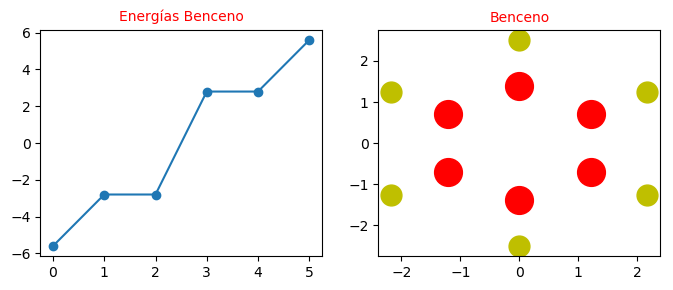

In [10]:
# Genera coordenadas
atom, coords = readfile("benzene.xyz")
x,y,z=np.transpose(coords)

# Genera energias
E, eigvec = energiasT(atom,coords,t=-2.8)

# Escribe archivo de coordenadas.
C = write_coords(atom, coords, "coordenadas.xyz")

# Grafica.
#-------------------------------------------------------------------------
fig,(ax1,ax2) = plt.subplots(figsize=(8,3), dpi=100, ncols=2)
ax1.set_title(u"Energías Benceno", fontsize=10, color='r')
ax2.set_title(u"Benceno", fontsize=10, color='r')
ax1.plot(E, 'o-')
ax2.plot(x[atom==1.],y[atom==1.], 'or', ms=20)
ax2.plot(x[atom!=1.],y[atom!=1.], 'oy', ms=15)
plt.show()
#-------------------------------------------------------------------------

#Carbonos=6.000000
Sum(Diag(P))=6.000000


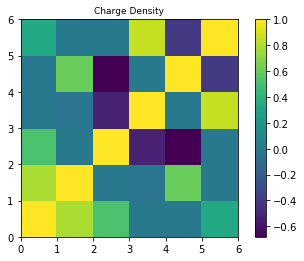

In [11]:
# Charge Density
P = ChargeDensity(coords, eigvec)

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_title("Charge Density",fontsize=9)
x = plt.pcolor(P)
plt.colorbar(x)
plt.show()

### 3.2. Punto cuántico triangular (n=5)
+ Cálculo de energías a partir de las coordenadas en un punto cuántico triangular (n).

#Carbonos=46.000000
Sum(Diag(P))=46.000000


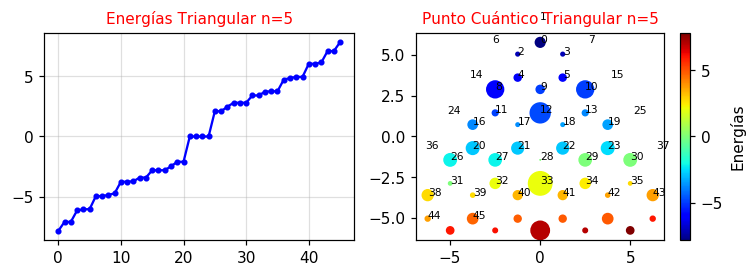

In [12]:
# Genera coordenadas
n=5
atom, coords = TriangularGraphene(n)
x, y, z = np.transpose(coords)

# Genera energias
E, eigvec = energiasT(atom,coords,t=-2.8)

# Escribe archivo de coordenadas.
C = write_coords(atom, coords, "coordenadas.xyz")

# Charge Density
P = ChargeDensity(coords, eigvec)


# Grafica.
#-------------------------------------------------------------------------
eig = 25
fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=110, ncols=2)
ax1.set_title(u"Energías Triangular n="+str(n), fontsize=10, color='r')
ax2.set_title(u"Punto Cuántico Triangular n="+str(n), fontsize=10, color='r')
ax1.plot(E, 'b.-')
Factor = np.array([eigvec[i][eig]*eigvec[i][eig] for i in range(len(E))])
C = ax2.scatter(x[atom==1], y[atom==1], s=Factor*2000, c=E, cmap='jet')
ax1.grid(alpha=0.4)
cbar = fig.colorbar(C)
cbar.set_label(u"Energías")
[ax2.text(x[i], y[i], str(i), fontsize=7) for i in range(len(x[atom==1]))]
plt.show()
#-------------------------------------------------------------------------

### 3.3 Puntos cuánticos triangulares (n=1,2,...,20)
+ Cálculo de energías a partir de las coordenadas en vatios puntos cuánticos triangulares (diferentes n).

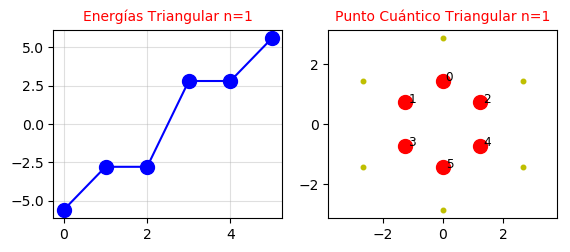

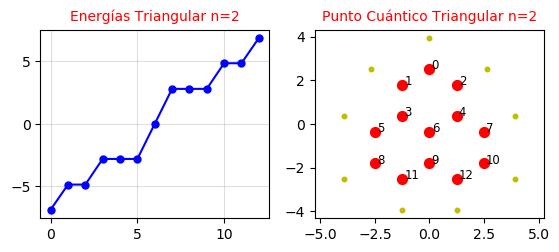

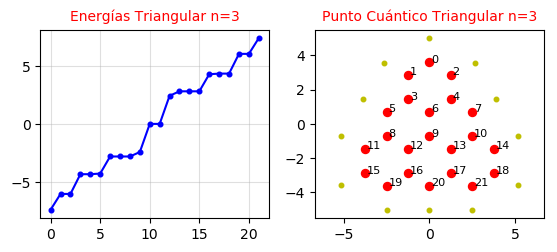

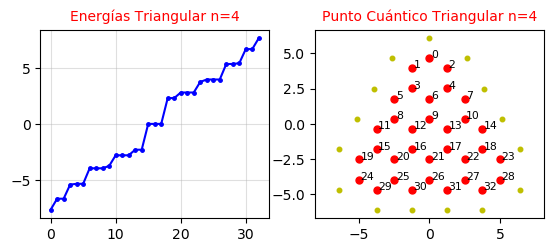

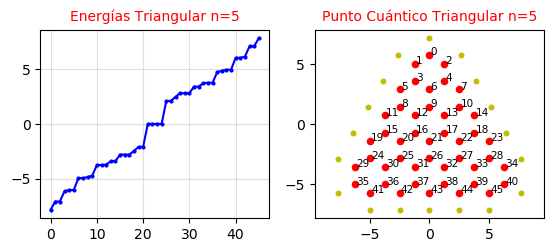

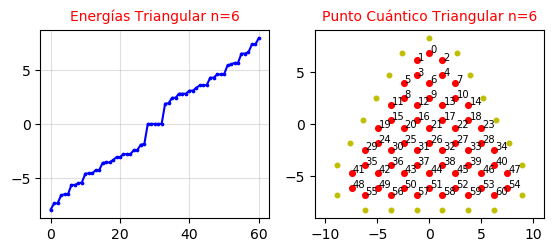

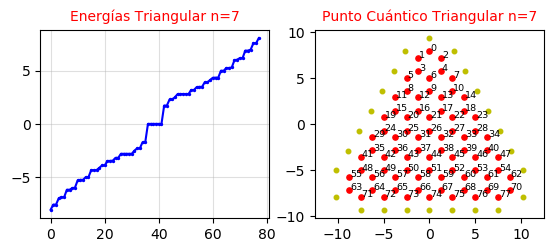

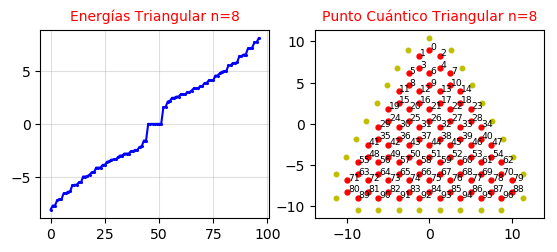

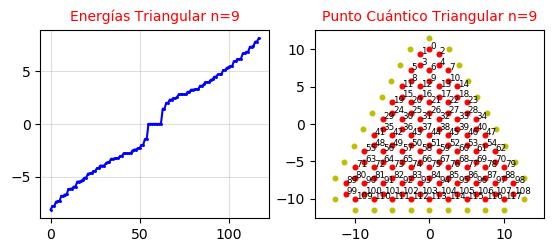

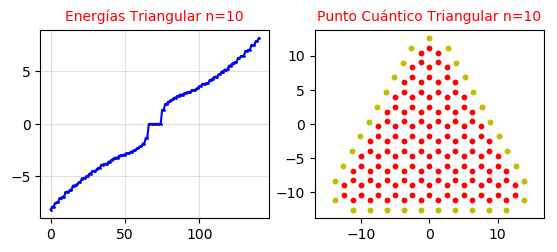

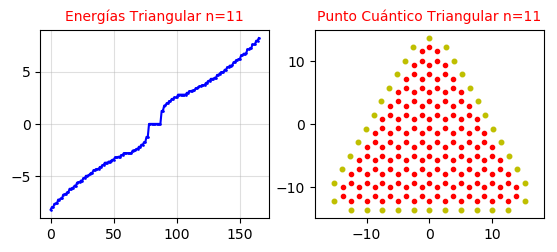

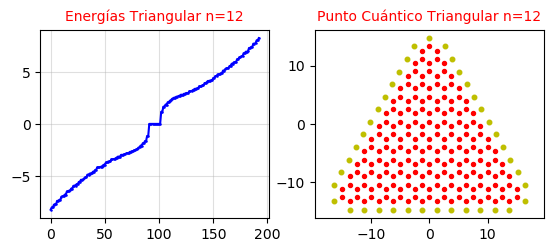

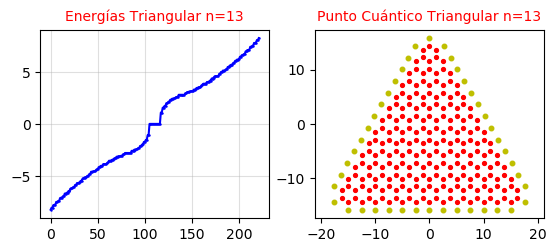

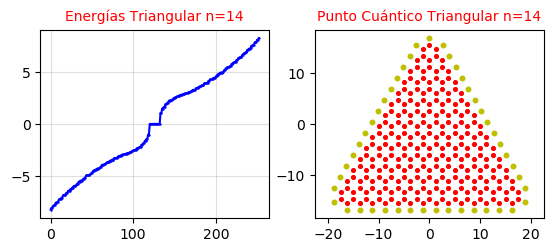

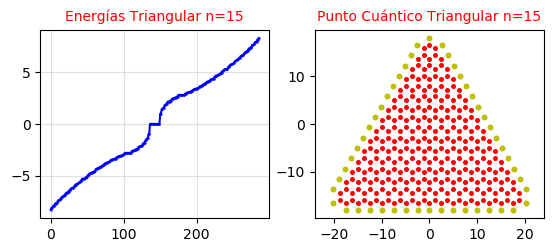

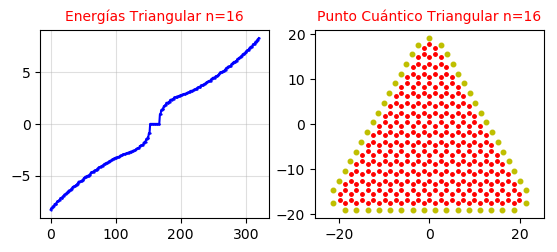

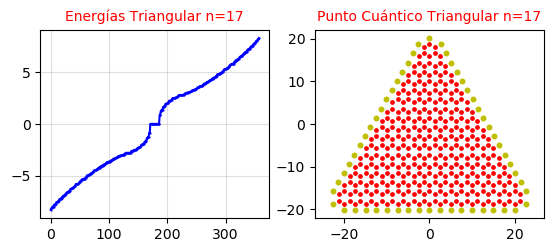

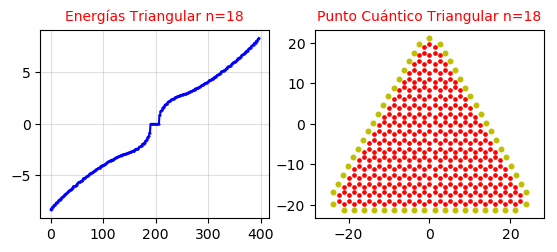

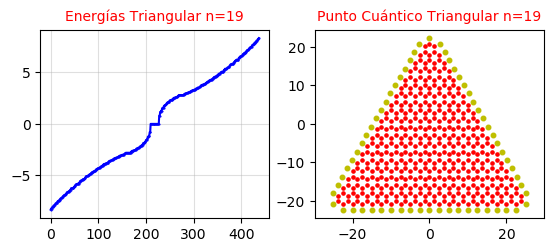

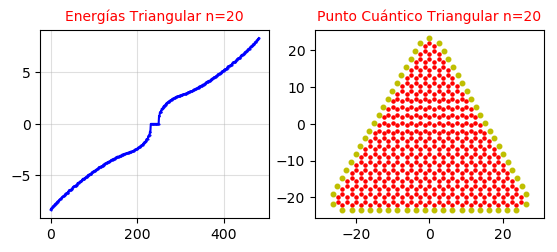

In [13]:
import matplotlib.pyplot as plt

for i in range(1,21):
    atom, coords = TriangularGraphene(i)
    x, y, z = np.transpose(coords)    
    E, eigvec = energiasT(atom,coords,t=-2.8)

    # Grafica.
    #-------------------------------------------------------------------------
    fig,(ax1,ax2) = plt.subplots(figsize=(6.5,2.5), dpi=100, ncols=2)
    ax1.set_title(u"Energías Triangular n="+str(i), fontsize=10, color='r')
    ax2.set_title(u"Punto Cuántico Triangular n="+str(i), fontsize=10, color='r')
    ax1.plot(E, 'b.-', ms=20/i)
    ax2.axis('equal')
    ax2.plot(x[atom==0], y[atom==0], '.', c='y', ms=7-0.1*n)
    x,y=x[atom==1],y[atom==1]
    C = ax2.scatter(x, y, c='r', cmap='jet', s=100/i)
    ax1.grid(alpha=0.4)
    if i<10: [ax2.text(x[j]+0.1, y[j], str(j), fontsize=9-0.3*i) for j in range(len(x))]
    plt.show()
    #-------------------------------------------------------------------------

### 3.4. Dos puntos cuánticos triangulares superpuestos.

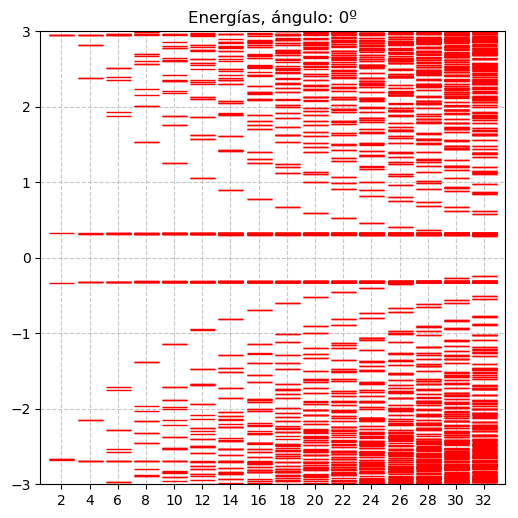

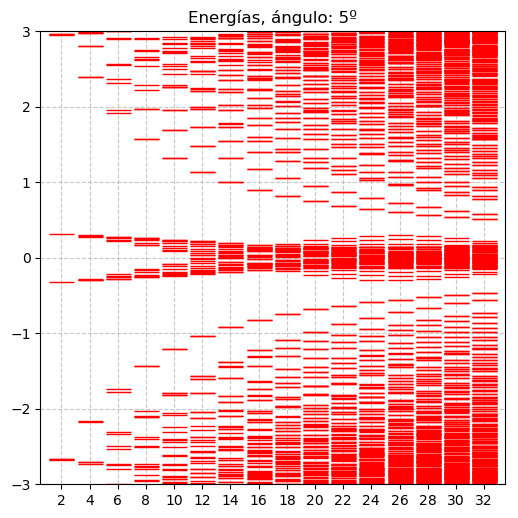

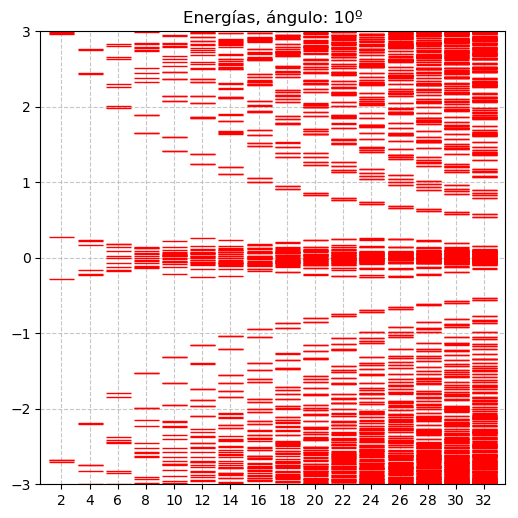

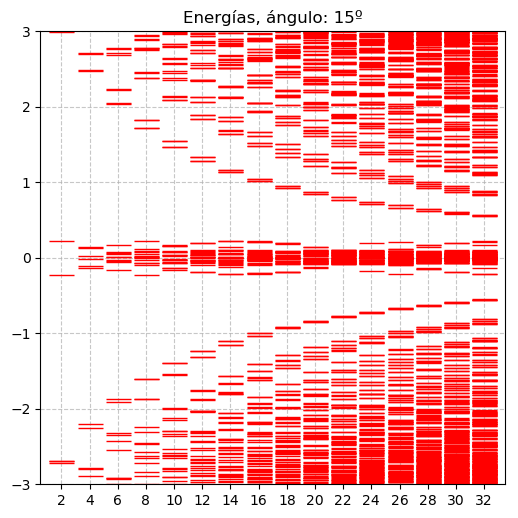

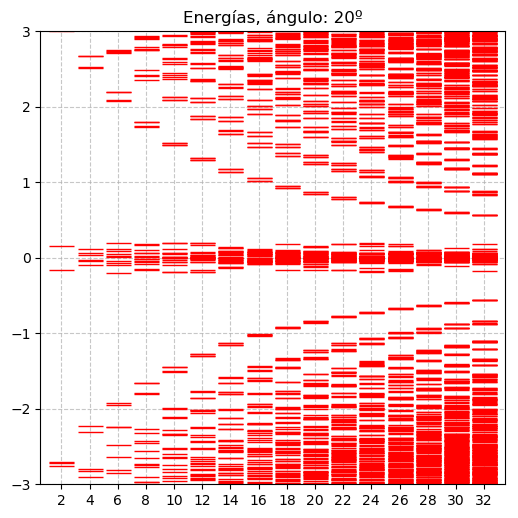

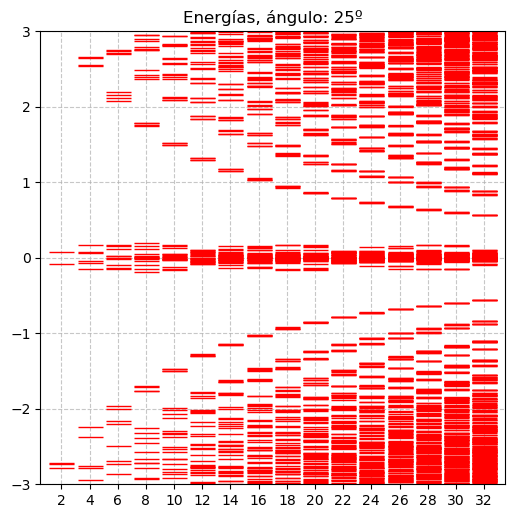

In [14]:
gamma = -0.39
Beta = 3.0
t = -3.16
for alpha in [0, 5, 10, 15, 20, 25]:
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.title(u"Energías, ángulo: "+str(alpha)+u"º")
    nn=34
    for n in range(2, nn, 2):
        atom1, coords1 = TriangularGraphene(n, d=0.0)
        atom2, coords2 = TriangularGraphene(n, d=3.3, ang=np.deg2rad(alpha))
        coords = np.array(list(coords1) + list(coords2))
        atom = np.array(list(atom1) + list(atom2))
        coords = coords[atom==1.]
        atom = atom[atom==1.]
        E, eigvec = energiasH(atom, coords, t, gamma, Beta)
        plt.plot(np.zeros(len(coords))+n, E, "_r", ms=18) #markeredgewidth=2.5)
        #plt.scatter(np.zeros(len(coords))+n, E, c=E/sum(E)*3, marker="_", cmap='jet', ms=10)
    plt.grid(alpha=0.7, ls='--')
    plt.xticks(range(2,nn,2))
    plt.ylim(-3,3)
    plt.show()

### 3.5. Vacantes

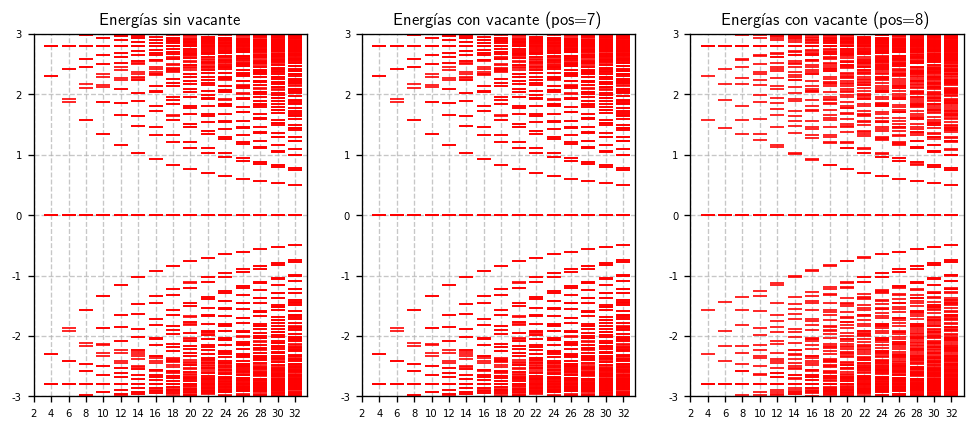

In [15]:
# Energias para un benzeno sin vacante.
def Energias(n, vacante=False):
    atom, coords = TriangularGraphene(n)
    atom, coords = list(atom), list(coords)
    if vacante!=False:
        atom.pop(vacante)
        coords.pop(vacante)
    X, Y, Z = np.transpose(coords)
    E, eigvec = energiasT(atom, coords, t=-2.8)
    return E, atom, coords

# Grafica --------------------------------------------------------------
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(10,4), dpi=120, ncols=3)
ax1.set_title(u'Energías sin vacante', fontsize=10, usetex=True)
ax2.set_title(u'Energías con vacante (pos=7)', fontsize=10, usetex=True)
ax3.set_title(u'Energías con vacante (pos=8)', fontsize=10, usetex=True)

nn=34
for n in range(4,nn,2):    
    # Sin vacante.
    E1, atom1, coords1 = Energias(n)
    ax1.plot(np.zeros(len(E1))+n, E1, "_r", ms=8)
    #write_coords(atom1, coords1, "sin_vacante"+str(n)+".xyz")
    
    # Con vacante pos (7)
    E2, atom2, coords2 = Energias(n, vacante=7)
    ax2.plot(np.zeros(len(E2))+n, E2, "_r", ms=8)
    #write_coords(atom2, coords2, "con_vacante_7-"+str(n)+".xyz")
    
    # Con vacante pos (8)
    E3, atom3, coords3 = Energias(n, vacante=8)
    ax3.plot(np.zeros(len(E3))+n, E3, "_r", ms=8)
    #write_coords(atom3, coords3, "con_vacante_8-"+str(n)+".xyz")

for ax in [ax1, ax2, ax3]:
    ax.grid(alpha=0.7, ls='--')
    ax.set_xticks(range(2,nn,2))
    ax.set_xticklabels(range(2,nn,2), fontsize=6)
    ax.set_ylim(-3,3)
    ax.set_yticks(range(-3,4))
    ax.set_yticklabels(range(-3,4), fontsize=6)

## <font color='blue'> 4. ANEXOS: </font>
+ Se agregan grafenos con diferentes formas: HEXAGONAL, CUADRADAS, CIRCULARES.
+ Se introduce el uso de Pybinding.

### 4.1. Figuras en grafenos.

#### 4.1.1. Hexagonales

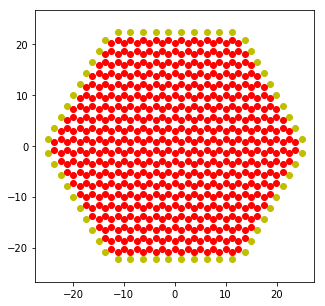

In [16]:
# -----------------------------------------------------------------
# Hexagonal de tamaño n. 
# (Con Hidrógenos incluídos)
# -----------------------------------------------------------------
def HexagonalGraphene(n, d=0.0, ang=0.0, CH=1.41):
    acc=1.44
    t = (1.5*n-1.)*acc # Traslacion en "y" para centrar.
    I = np.append(np.arange(n,n*2-1), np.arange(n*2-1,n-1,-1))
    x, y = [], []
    atomos = []
    for k in range(n*2-1):
        i=I[k]
        j = t + k*-1.5*acc    
        X = np.linspace(-i*sqrt(3)*acc/2, i*sqrt(3)*acc/2,i+1)
        Y= np.ones(i+1)*j
        x += list(X) +   list(X)
        y += list(Y) + list(Y-acc)
        atomos += list(np.ones((i+1)*2))
        if k<n:
            x += [X[0]-sqrt(3)/2*CH, X[-1]+sqrt(3)/2*CH]
            y += [j+CH/2]*2
            atomos += [0,0]
    x += list(np.linspace(-(n-1)*sqrt(3)*acc/2, (n-1)*sqrt(3)*acc/2, n))*3
    y += list(np.ones(n)*t+0.5*acc) + list(np.ones(n)*(j-acc)-0.5*acc) + list(np.ones(n)*t+acc/2+CH)
    atomos += list(np.ones(n*2)) + list(np.zeros(n))
    x, y = np.array(x), np.array(y)
    m = len(x[np.array(atomos)==0])
    x = np.append(x, x[np.array(atomos)==0])
    y = np.append(y, -y[np.array(atomos)==0])
    atomos += list(np.zeros(m))
    z = np.ones(len(x))*d
    if ang!=0: x, y = rotacion(x,y, ang)
    return np.array(atomos), np.transpose([x,y,z])

# GRAFICA
# -----------------------------------------------------------------
n=10
atom, coords = HexagonalGraphene(n)
x, y, z = np.transpose(coords)
plt.figure(figsize=(5,5))
plt.plot(x[atom==0.],y[atom==0.],'oy')
plt.plot(x[atom==1.],y[atom==1.],'or')
plt.axis('equal')
plt.show()

#### 4.1.2. Cuadrados

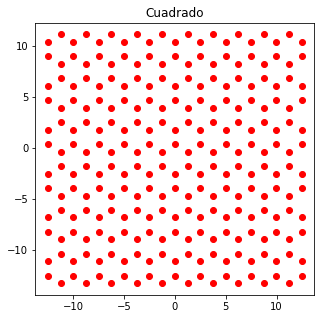

In [17]:
# -----------------------------------------------------------------
# Cuadrado de tamaño n. 
# -----------------------------------------------------------------
def Cuadrado(n, d=0.0, ang=0.0, acc=1.44):
    t = -acc/2 - n*-1.5*acc/2 + acc/4 
    x = list(np.arange(-(n-1)*sqrt(3)*acc/2, n*sqrt(3)*acc/2+1, sqrt(3)*acc))
    y = list(np.ones(n)*t+acc/2)
    I = [n,n-1]*n
    for k in range(n+1):
        i=I[k]
        j = t + k*-1.5*acc    
        X = np.arange(-i*sqrt(3)*acc/2, i*sqrt(3)*acc/2+1, sqrt(3)*acc)
        Y = np.ones(i+1)*j
        x += list(X)+list(X)
        y += list(Y)+list(Y-acc)
    x+=list(X+sqrt(3)*acc/2)
    y+=list(Y-3/2*acc)
    x.pop(-1)
    y.pop(-1)
    n = n-1 if n%2==0 else n
    if ang!=0: x, y = rotacion(x,y, ang)
    z = list(np.ones(len(x))*d)
    coords = np.transpose([x,y,z])
    return coords

# GRAFICA
# -----------------------------------------------------------------
n=10
plt.figure(figsize=(5,5))
coords = Cuadrado(n)
x,y,z=np.transpose(coords)
plt.title('Cuadrado')
plt.plot(x,y,'or')
plt.axis('equal')
plt.show()

#### 4.1.3. Circulares

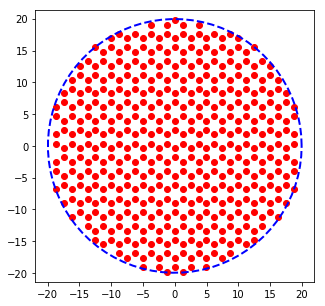

In [18]:
MAYA100=Cuadrado(100)
def Circulo(n, d=0., coords=MAYA100):
    acc = 1.44
    x,y,z=np.transpose(coords)
    indices=[]
    N = len(x)
    radius = sqrt(3)/2*acc*n
    for i in range(N):
        if x[i]**2+y[i]**2>radius**2:
            indices += [i]
    x=np.delete(x,indices)
    y=np.delete(y,indices)
    z = np.ones(len(x))*d
    return np.transpose([x,y,z])

n = 16

# GRAFICA
# -----------------------------------------------------------------
x,y,z = np.transpose(Circulo(n))
fig=plt.figure(figsize=(5,5))
plt.plot(x,y,'or')
plt.axis('equal')

# Circulo exterior
an = np.linspace(0, 2 * np.pi, 80)
acc=1.44
radius = sqrt(3)/2*acc*n
ox, oy = radius*np.cos(an),  radius*np.sin(an)
plt.plot(ox, oy, '--b', lw=2)

plt.show()

### 4.2. Introducción uso del paquete Pybinding

+ El valor de acc para Pybinging es 0.1419992871601831

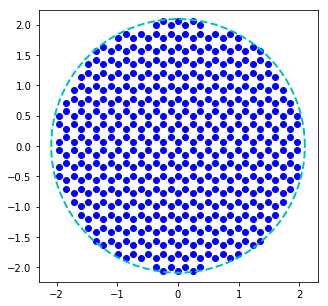

In [19]:
import pybinding as pb
from pybinding.repository import graphene

acc=0.142 #nm -> Nanómetros
n=16
n=n+1
r=acc*sqrt(3)/2*n
def circle(radius):
    def contains(x, y, z):
        return np.sqrt(x**2 + y**2) < radius
    return pb.FreeformShape(contains, width=[2*radius, 2*radius])
model = pb.Model(
graphene.monolayer(),
circle(radius=r)
)

# GRAFICA
# -----------------------------------------------------------------
plt.figure(figsize=(5,5))
x,y = model.system.x, model.system.y
plt.plot(x,y,'ob')
plt.axis('equal')

# Circulo exterior
an = np.linspace(0, 2 * np.pi, 80)
radius = r
ox, oy = radius*np.cos(an),  radius*np.sin(an)
plt.plot(ox, oy, '--c', lw=2)
plt.show()